In [1]:
import csv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, MaxPooling2D, Cropping2D, Dropout

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


Using TensorFlow backend.
C:\Users\my pc\.conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\my pc\.conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\my pc\.conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\my pc\.conda\envs\carnd-term1

In [11]:
lines = []
with open("mydata-backup/driving_log.csv") as f:
    reader = csv.reader(f)
    for line in reader:
        
        lines.append(line)
lines=lines[1:]

train_samples, validation_samples = train_test_split(lines, test_size=0.2)
print("train length:", len(train_samples))
print("validation length:", len(validation_samples))
print(lines[0])

train length: 2510
validation length: 628
['C:\\Users\\my pc\\Desktop\\mydata\\IMG\\center_2023_07_30_12_30_29_826.jpg', 'C:\\Users\\my pc\\Desktop\\mydata\\IMG\\left_2023_07_30_12_30_29_826.jpg', 'C:\\Users\\my pc\\Desktop\\mydata\\IMG\\right_2023_07_30_12_30_29_826.jpg', '0', '0.444084', '0', '0.4339852']


In [3]:
# def generator(samples, batch_size=32):
#     num_samples = len(samples)
#     while 1: # Loop forever so the generator never terminates
#         shuffle(samples)
#         for offset in range(0, num_samples, batch_size):
#             batch_samples = samples[offset:offset+batch_size]

#             images = []
#             angles = []
#             for batch_sample in batch_samples:
#                 name = 'data/'+batch_sample[0]
#                 center_image = cv2.imread(name)
#                 center_angle = float(batch_sample[3])
#                 images.append(center_image)
#                 angles.append(center_angle)

#             # trim image to only see section with road
#             X_train = np.array(images)
#             y_train = np.array(angles)
#             yield shuffle(X_train, y_train)
# train_generator = generator(train_samples, batch_size=32)
# validation_generator = generator(validation_samples, batch_size=32)

In [12]:
images = []
measurements = []

for line in lines:
    source_path = line[0]
    
    current_path = "mydata-backup/IMG/" + source_path.split('\\')[-1]
    image = cv2.imread(current_path)
    images.append(image)
    measurements.append(float(line[3]))
    


print(f'images : {len(images)}')
print(f'steerings : {len(measurements)}')

augmented_images = []
augmented_measurements = []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)  

print(f'augmented images : {len(X_train)}')
print(f'augmented steerings : {len(y_train)}')

images : 3138
steerings : 3138
augmented images : 6276
augmented steerings : 6276


# LeNet

In [5]:
model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70, 20), (0, 0))))
model.add(Convolution2D(6,5,5, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(6,5,5, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))
model.summary()

NameError: name 'Convolution2D' is not defined

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=2)
model.save('model.h5')

# NVIDIA

In [13]:
model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 33, 64)         36928     
__________

In [14]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)
# model.fit_generator(train_generator, steps_per_epoch= len(train_samples),
# validation_data=validation_generator, validation_steps=len(validation_samples), epochs=5, verbose = 1)


Train on 5020 samples, validate on 1256 samples
Epoch 1/5
5020/5020 [==============================] - 123s 24ms/step - loss: 0.0182 - val_loss: 0.0776
Epoch 2/5
5020/5020 [==============================] - 119s 24ms/step - loss: 0.0147 - val_loss: 0.0748
Epoch 3/5
5020/5020 [==============================] - 119s 24ms/step - loss: 0.0147 - val_loss: 0.0761
Epoch 4/5
5020/5020 [==============================] - 116s 23ms/step - loss: 0.0136 - val_loss: 0.0726
Epoch 5/5
5020/5020 [==============================] - 115s 23ms/step - loss: 0.0132 - val_loss: 0.0727


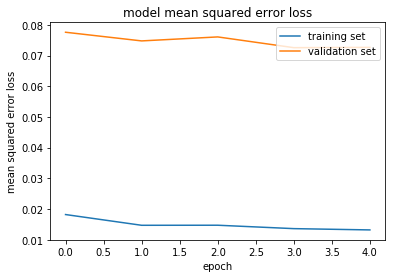

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [16]:
model.save('model.h5')